# The Sparks Foundation - GRIP  Task 2 & 6 (IRIS DATASET)

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns


In [97]:
df = pd.read_csv('Iris.csv')

In [98]:
df.head()# y variable-Species

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [100]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [101]:
df.Species.nunique()

3

In [102]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


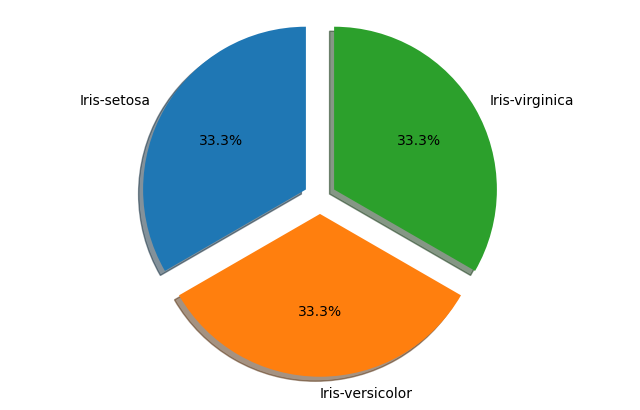

In [103]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)

# Use the unique species labels as labels for the pie chart
labels = df['Species'].value_counts().index.tolist()

# Calculate the explode values for each slice (e.g., 0.1 for all slices)
explode = [0.1] * len(labels)

# Plot the data from df['Species'].value_counts()
patches, texts, autotexts = ax.pie(df['Species'].value_counts(), autopct='%1.1f%%', shadow=True, 
                                   startangle=90, explode=explode, labels=labels)

# Set the aspect ratio to be equal so that it's a circle
ax.axis('equal')

plt.show()


In [104]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [105]:
df.Species.value_counts().reset_index()

,index,Species
0,Iris-setosa,50
1,Iris-versicolor,50
2,Iris-virginica,50


In [106]:
df.shape

(150, 6)

In [107]:
nan_check = df.isna()

any_nan = nan_check.any().any()

if any_nan:
    print("There are NaN values in the DataFrame.")
else:
    print("No NaN values found in the DataFrame.")


No NaN values found in the DataFrame.


In [110]:
unwanted_columns=['Id']
df.drop(labels=unwanted_columns, axis=1, inplace=True)

In [111]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [113]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

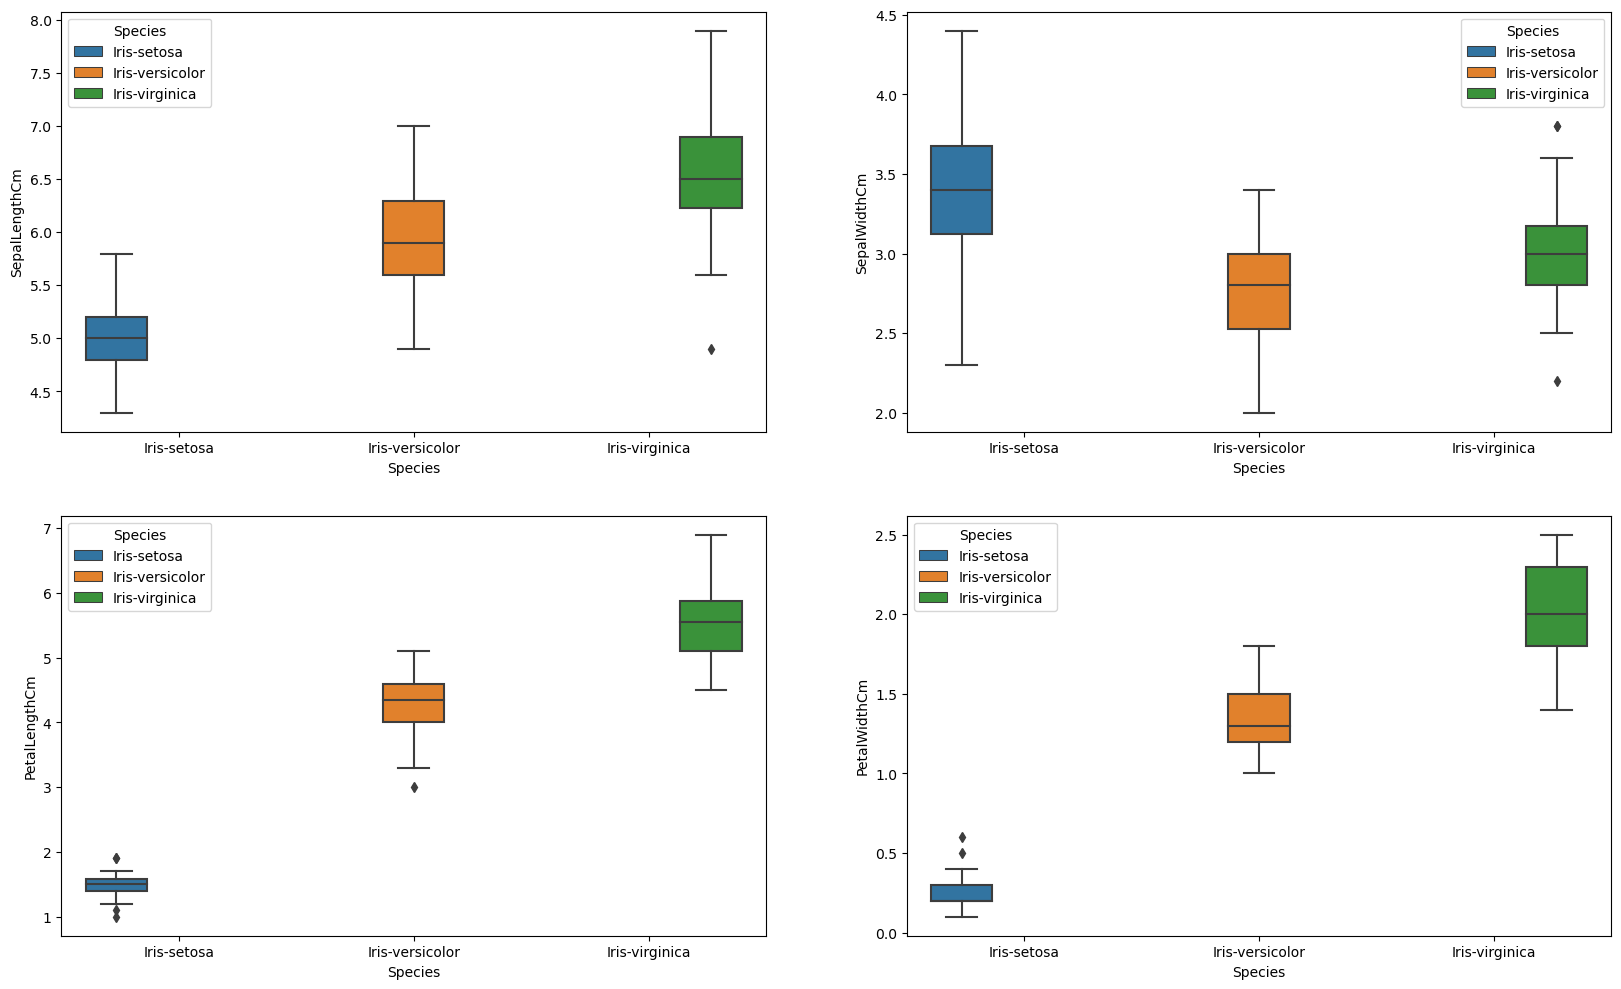

In [114]:
fig, axarr = plt.subplots(2,2,figsize = (20,12))
sns.boxplot(y = 'SepalLengthCm', x = 'Species', hue = 'Species', data = df, ax = axarr[0][0])
sns.boxplot(y = 'SepalWidthCm', x = 'Species', hue = 'Species', data = df, ax = axarr[0][1])
sns.boxplot(y = 'PetalLengthCm', x = 'Species', hue = 'Species', data = df, ax = axarr[1][0])
sns.boxplot(y = 'PetalWidthCm', x = 'Species', hue = 'Species', data = df, ax = axarr[1][1])


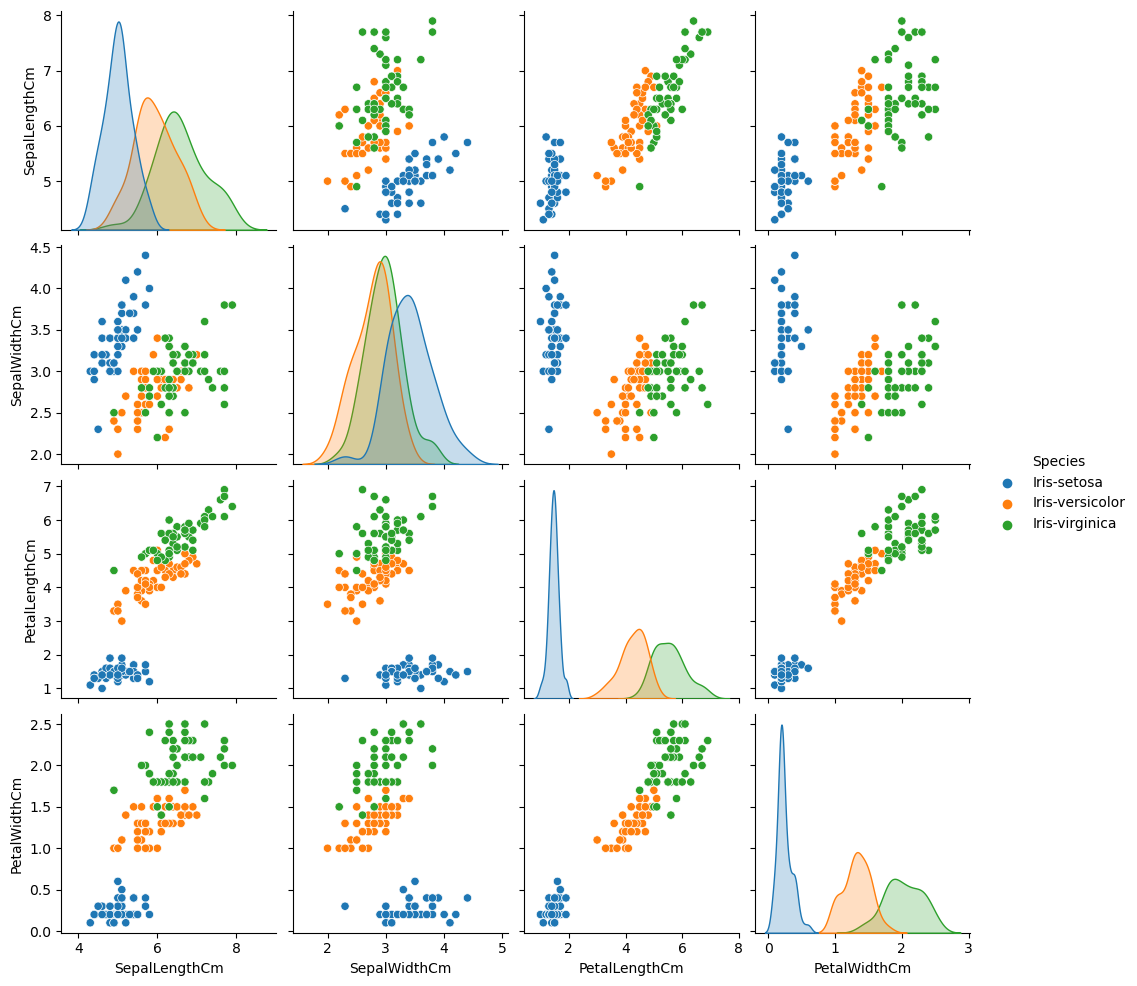

In [115]:
sns.pairplot(df, hue= 'Species', data = df)

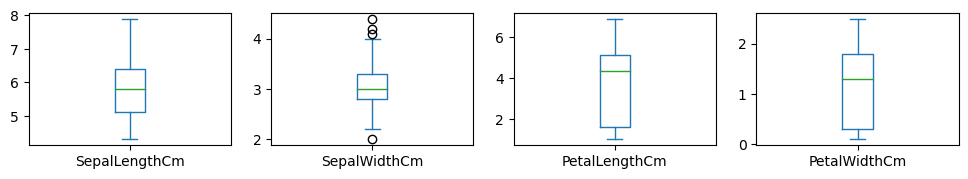

In [116]:
# Create subplots of box plots 
df.plot.box(subplots=True, layout=(5, 4), sharex=True, figsize=(12, 10)) 
# Display the plots 
plt.show()


In [117]:
selected_columns = ['SepalWidthCm']

# Calculate Q1, Q3, and IQR
Q1 = df[selected_columns].quantile(0.25)
Q3 = df[selected_columns].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper limits
Lower_limit = Q1 - 1.5 * IQR
Upper_limit = Q3 + 1.5 * IQR

# Define the limit_imputer function
def limit_imputer(value, lower_limit, upper_limit):
    return min(max(value, lower_limit), upper_limit)

# Create a new DataFrame for the processed data
processed_df = df.copy()

# Apply the limit_imputer function element-wise to the selected columns
for column in selected_columns:
    processed_df[column] = processed_df[column].apply(limit_imputer, lower_limit=Lower_limit[column], upper_limit=Upper_limit[column])

# Print the processed DataFrame
print(processed_df)



     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


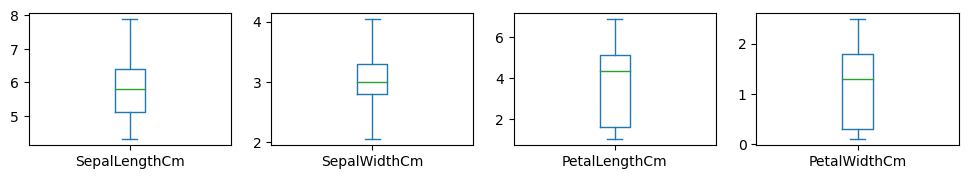

In [118]:
# Create subplots of box plots 
processed_df.plot.box(subplots=True, layout=(5, 4), sharex=True, figsize=(12, 10)) 
# Display the plots 
plt.show()


In [123]:
x= processed_df.iloc[:,0:-1] ## Independent Features
y= processed_df.iloc[:,-1] ## Dependent Variables


In [124]:
 !pip install scikit-learn

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)


In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

In [126]:
from sklearn.cluster import KMeans


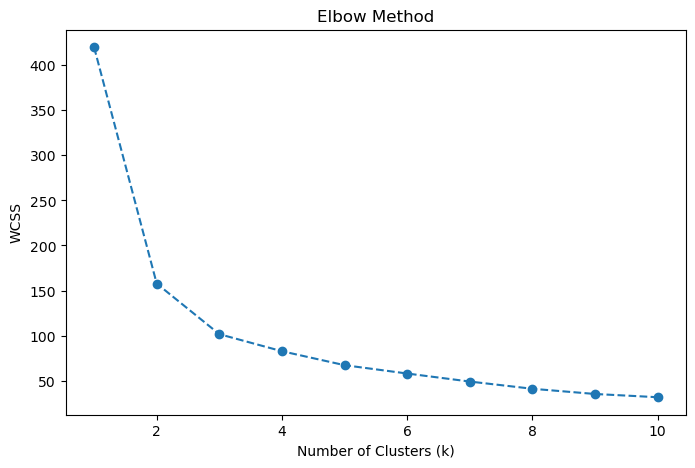

In [127]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []  # List to store the within-cluster sum of squares

for i in range(1, 11):  # Trying different values of k (number of clusters)
    kmeans = KMeans(n_clusters=i,init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state=123)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()
n_init='auto'

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


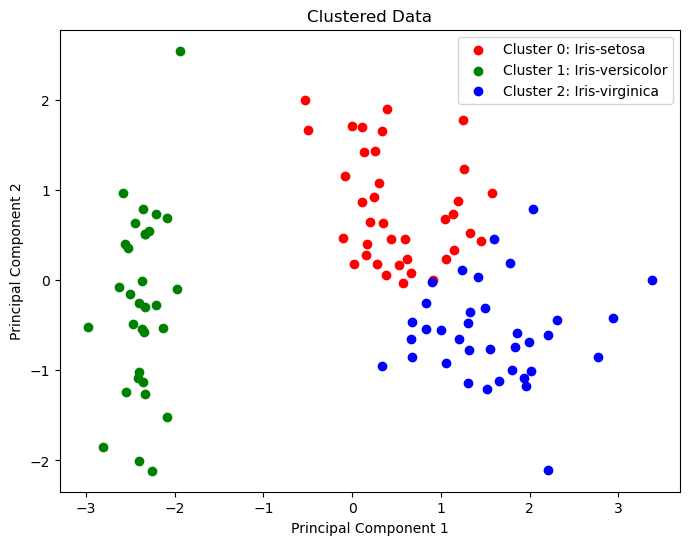

In [128]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Choose the optimal number of clusters (k) based on the Elbow Method or other criteria
k = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=123)
clusters = kmeans.fit_predict(x_train)  # x_train should contain your feature data

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(x_train)

# Create a color map for clusters
colors = ['r', 'g', 'b'] #specify colors for each cluster

# Define a mapping from cluster number to label
cluster_labels = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

# Create an empty legend_entries list to store legend labels
legend_entries = []

# Plot the clusters
plt.figure(figsize=(8, 6))
for i in range(k):
    cluster_data = reduced_data[clusters == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], c=colors[i], label=cluster_labels[i])
    legend_entries.append(f'Cluster {i}: {cluster_labels[i]}')

plt.title('Clustered Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(legend_entries)  # Use legend_entries as the legend labels
plt.show()


In [150]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [151]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [152]:
clf= DecisionTreeClassifier(criterion= 'entropy', splitter = 'best', max_depth = 5)

In [153]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [160]:
test_predict = clf.predict(x_test)
test_predict

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

In [155]:
k = accuracy_score(y_test,test_predict)
print('Test accuracy_score:', k)

Test accuracy_score: 0.9555555555555556


In [158]:
k = precision_score(y_test, test_predict, average='macro')
print('Test precision_score:', k)


Test precision_score: 0.9444444444444445


In [161]:

k = recall_score(y_test, test_predict, average='macro')
print('Test recall score:', k)


Test recall score: 0.9607843137254902


In [ ]:
#Author - Nusrat Rizvi